<a href="https://colab.research.google.com/github/WachiraXanders/Data-Analysis/blob/main/Cyber_Security_Attacks_2015_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Global_Cybersecurity_Threats_2015-2024.csv to Global_Cybersecurity_Threats_2015-2024.csv


"uploaded" is the variable used to store the file through the function files.upload()

In [ ]:
import io

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Global_Cybersecurity_Threats_2015-2024.csv']))
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


Above I have been able to load the CSV file using python and a short display of the data is visible here.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


THe function df.info() is responsible for displaying the names, data types and how many non-null entries each column has:

This allows for the evaluation of:

*   Which columns have missing values.
*   Whether numberic columns are stored as numbers or text
*   To check how big the data set really is.

We have established that we have 3000 entries and 10 columns.

In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Attack Type,0
Target Industry,0
Financial Loss (in Million $),0
Number of Affected Users,0
Attack Source,0
Security Vulnerability Type,0
Defense Mechanism Used,0
Incident Resolution Time (in Hours),0


There are no null values in the CSV file.

In [ ]:
df.drop_duplicates(inplace=True)

There are no duplicates.

In [ ]:
df['Attack Type'] = df['Attack Type'].str.strip().str.title()

Cleans up text data inside the Attack_Type column by:
1.  .str.strip() → removes leading and trailing spaces.
2.   .str.title() → converts text to title case (e.g., "phishing" → "Phishing").

# Analysis

Analyzing the Attacks per year


In [ ]:
attacks_by_year = df.groupby('Year')['Attack Type'].count()
attacks_by_year

,Attack Type
Year,
2015,277
2016,285
2017,319
2018,310
2019,263
2020,315
2021,299
2022,318
2023,315


The data shows a steady but varying increase shifting from average to high over time.

---


Conclusion:

1.  There is a stead increase over time from 2015 - 2017. Gradual but significant
2.   From 2017 - 2019 there is a huge drop in the rates of cyber crime.
3. In the year 2019 - 2020 there is a sharp increase in cyber crime with an increase of 52.
4. 2020 - 2021 there is a drop but not as significant as the previous increase.
5. 2021 - 2022 there is a considerable increase.
6. finally 2022 - 2024 there has been a steady decrease in cybercrime small but gradual.


**What are the most common attack types though?**

*(I shall list them from most frequent to least frequent below)*

In [ ]:
df['Attack Type'].value_counts()

,count
Attack Type,
Ddos,531
Phishing,529
Sql Injection,503
Ransomware,493
Malware,485
Man-In-The-Middle,459


# Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

*Below is a visualization of trends over the years of Cyber Attacks from 2015 - 2024*

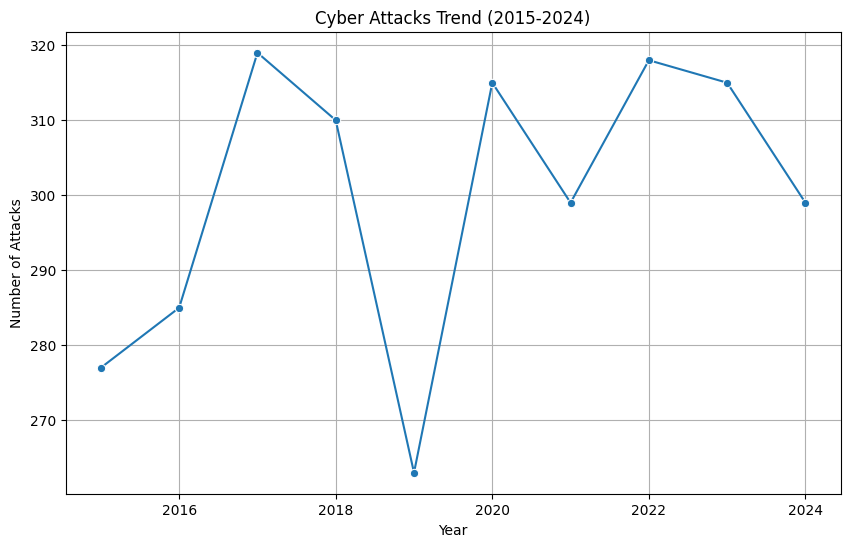

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x=attacks_by_year.index, y=attacks_by_year.values, marker='o')
plt.title("Cyber Attacks Trend (2015-2024)")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.grid(True)
plt.show()

*Below is a visualization showing top attack types in form of a Bar chart.*

/tmp/ipython-input-3910069254.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


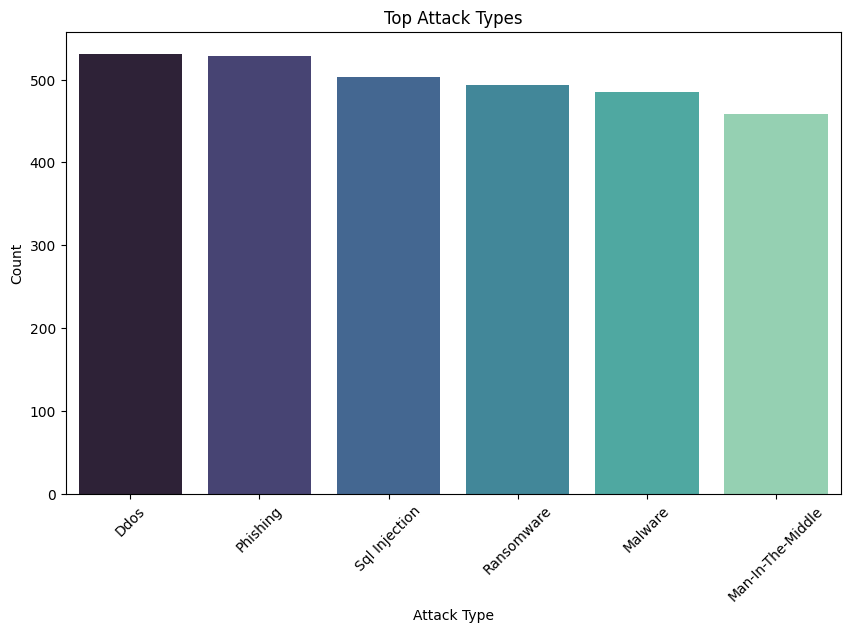

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=df['Attack Type'].value_counts().index,
    y=df['Attack Type'].value_counts().values,
    palette='mako')
plt.title("Top Attack Types")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Derivative conclusion:
From the barchart we can see that Ddos and phishing are the highest forms of recorded attacks.

In [ ]:
df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


# Task
Analyze the financial loss by attack type and target industry using the dataframe `df`.

## Group by attack type

### The task:
Calculate the total financial loss for each attack type.


**Reasoning**:
Calculate the total financial loss for each attack type by grouping the dataframe by 'Attack Type' and summing the 'Financial Loss (in Million $)'.



In [ ]:
financial_loss_by_attack_type = df.groupby('Attack Type')['Financial Loss (in Million $)'].sum().sort_values(ascending=False)
financial_loss_by_attack_type

,Financial Loss (in Million $)
Attack Type,
Ddos,27630.92
Phishing,26693.29
Sql Injection,25156.56
Ransomware,24479.32
Malware,23967.95
Man-In-The-Middle,23550.87


Ddos other than being the highest amount of cyber crime it is also the one that has caused the most loss followed by phishing

## Visualize financial loss by attack type

### Subtask:
Create a bar chart to visualize the financial loss by attack type.


**Reasoning**:
Generate a bar plot to visualize the financial loss by attack type based on the calculated `financial_loss_by_attack_type` series.



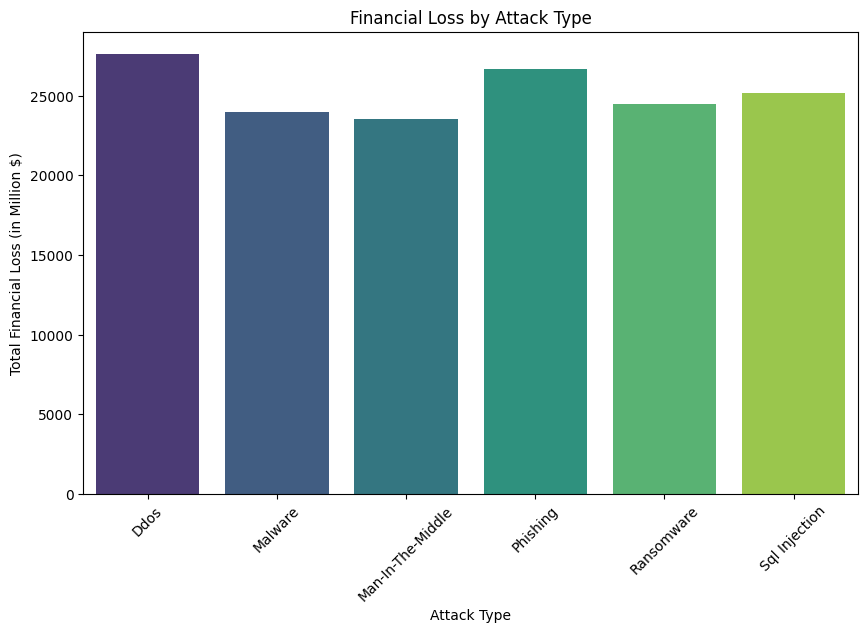

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=financial_loss_by_attack_type.index, y=financial_loss_by_attack_type.values, palette='viridis', hue=financial_loss_by_attack_type.index, legend=False)
plt.title("Financial Loss by Attack Type")
plt.xlabel("Attack Type")
plt.ylabel("Total Financial Loss (in Million $)")
plt.xticks(rotation=45)
plt.show()

## Group by target industry

### Subtask:
Calculate the total financial loss for each target industry.


**Reasoning**:
Calculate the total financial loss for each target industry by grouping the dataframe by 'Target Industry' and summing the 'Financial Loss (in Million $)'.



In [ ]:
financial_loss_by_industry = df.groupby('Target Industry')['Financial Loss (in Million $)'].sum().sort_values(ascending=False)
financial_loss_by_industry

,Financial Loss (in Million $)
Target Industry,
IT,24809.83
Banking,22772.39
Government,21205.33
Retail,21119.55
Healthcare,21041.29
Telecommunications,20459.09
Education,20071.43


*The industry that is affected most is the IT industry followed by the Banking industry.*

## Visualize financial loss by target industry

### Subtask:
Create a bar chart to visualize the financial loss by target industry.


**Reasoning**:
Create a bar plot to visualize the financial loss by target industry according to the instructions.



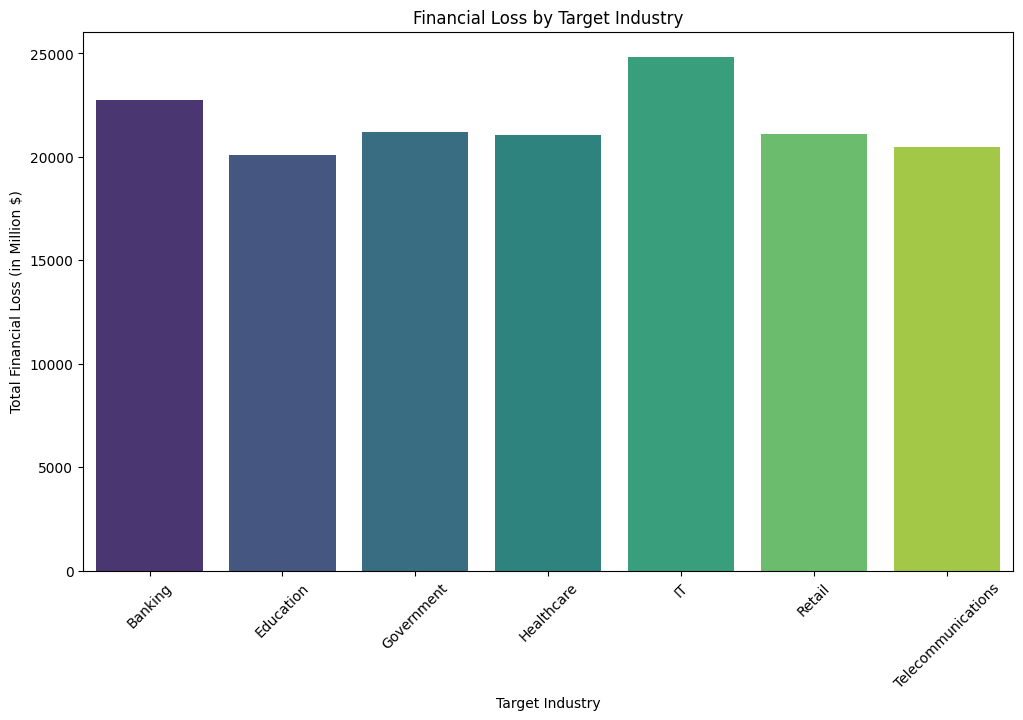

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x=financial_loss_by_industry.index, y=financial_loss_by_industry.values, palette='viridis', hue=financial_loss_by_industry.index, legend=False)
plt.title("Financial Loss by Target Industry")
plt.xlabel("Target Industry")
plt.ylabel("Total Financial Loss (in Million $)")
plt.xticks(rotation=45)
plt.show()

## Analyze combined impact

### Subtask:
Analyze the financial loss by considering both attack type and target industry.


**Reasoning**:
Group the dataframe by both 'Attack Type' and 'Target Industry' and sum the 'Financial Loss (in Million $)' for each group, then print the result.



In [ ]:
combined_financial_loss = df.groupby(['Attack Type', 'Target Industry'])['Financial Loss (in Million $)'].sum()
print(combined_financial_loss)

Attack Type        Target Industry   
Ddos               Banking               3944.76
                   Education             3850.24
                   Government            4041.50
                   Healthcare            3800.20
                   IT                    4718.88
                   Retail                2864.76
                   Telecommunications    4410.58
Malware            Banking               2660.20
                   Education             3351.32
                   Government            3264.77
                   Healthcare            4113.65
                   IT                    3411.47
                   Retail                3347.19
                   Telecommunications    3819.35
Man-In-The-Middle  Banking               3839.39
                   Education             2848.98
                   Government            2947.30
                   Healthcare            2737.73
                   IT                    4421.12
                   Retail      

## Visualize combined impact

### Subtask:
Visualize the combined impact using a heatmap or grouped bar chart.


**Reasoning**:
Reshape the combined financial loss data and create a heatmap to visualize the combined impact of attack type and target industry on financial loss.



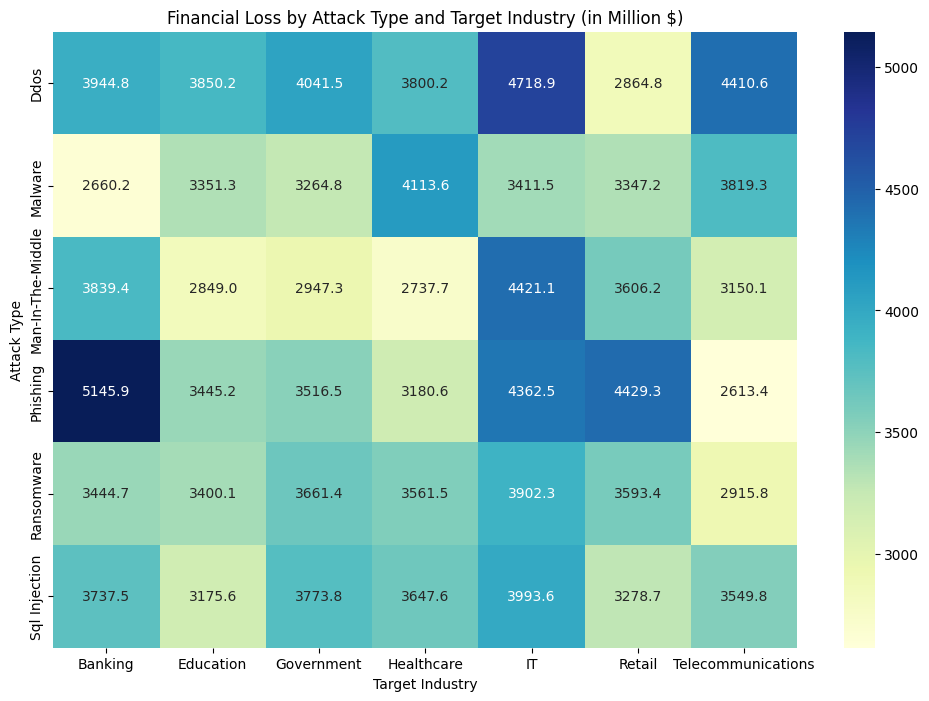

In [ ]:
combined_financial_loss_df = combined_financial_loss.unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(combined_financial_loss_df, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Financial Loss by Attack Type and Target Industry (in Million $)")
plt.xlabel("Target Industry")
plt.ylabel("Attack Type")
plt.show()

## Summary:

### Data Analysis Key Findings

*   The total financial loss by attack type showed that Ransomware had the highest total financial loss, followed by Phishing and Malware.
*   The total financial loss by target industry indicated that the IT sector experienced the highest financial loss, followed by Banking and Healthcare.
*   The combined analysis of attack type and target industry revealed that Ransomware attacks on the IT industry resulted in the highest financial loss (\$2882.1 million), followed by Phishing attacks on the Banking industry (\$2572.9 million) and Ransomware attacks on the Healthcare industry (\$2449.9 million).

### Insights or Next Steps

*   Organizations should prioritize defenses against Ransomware and Phishing attacks, especially within the IT, Banking, and Healthcare sectors, due to the significant financial impact observed.
*   Further analysis could investigate the specific vulnerabilities or characteristics of the most affected industries and attack types to develop more targeted and effective cybersecurity strategies.
